# **Import all the necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML


# **Step 1: Data Preprocessing**

In [ ]:
#Load the dataset
boston = load_boston()

#describe the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
#Put the data into pandas Dataframe
x = pd.DataFrame(boston.data,columns=boston.feature_names)
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
# creating a new variable
y = pd.DataFrame(boston.target, columns=['target'])
y

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
#Concatenation of features and target into a single Dataframe
#axis = 1 makes it concatenate column wise

df= pd.concat([x,y],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
#describe the dataset
df.describe().round(decimals= 2 )


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


# **Step 2 : Data Visualization**

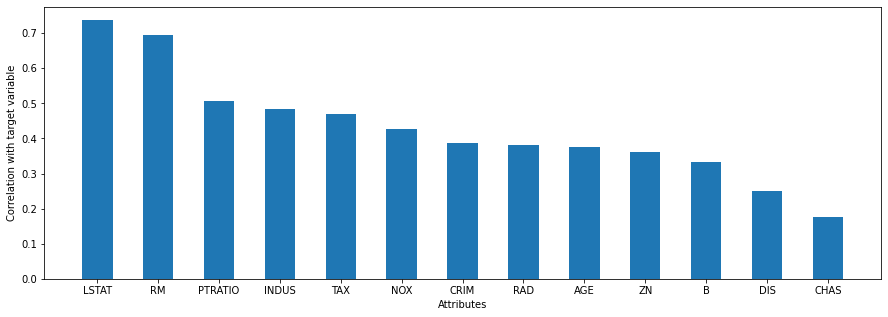

In [ ]:
#Correlation between Target & Attributes
#Calculate correlation between every column on the data

corr = df.corr(method = 'pearson')

#Take the absolute values of the correlation
# each attribute with the target
corrs = [abs(corr[attr]['target']) for attr in list(x)]


#Making a list of pairs [(corr, feature)]
l = list(zip(corrs,list(x)))


#Sort the list of pairs in reverse /descending order
#with the correlation value as the key for sorting
l.sort(key = lambda x:x[0], reverse = True)


# "Unzip" pairs to 2 lists
# zip(*l) - takes a list that looks like  [[a,b,c], [d,e,f], [g,h,i]]
# and returns [[a,d,g], [b,e,h], [c,f,i]]
corrs, labels = list(zip((*l)))

#Plot the correlation with respect to the target variable as a bar graph
index = np.arange(len(labels))
plt.figure(figsize=(15, 5))
plt.bar(index, corrs, width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with target variable')
plt.xticks(index, labels)
plt.show()


# **Step 3 :Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X = mm.fit_transform(x)
Y = mm.fit_transform(y)

# **Step 4: Splitting the Data**

In [ ]:
#Splitting the entire data as 70% training data & 30% testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)


In [ ]:
#Using Linear Regression Model
from sklearn.linear_model import LinearRegression
lm =LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Predicting the target values
y_pred=lm.predict(x_test)


In [ ]:
#Finding the slope
lm.coef_

array([[-0.304032  ,  0.14447984, -0.01470679,  0.03604518, -0.16523925,
         0.38875365,  0.02443898, -0.37831993,  0.15468363, -0.14243197,
        -0.16952149,  0.11413114, -0.43879519]])

In [ ]:
#Finding the intercept
lm.intercept_

array([0.4536474])

In [ ]:
#MSE for Training data
from sklearn.metrics import mean_squared_error
mean_squared_error(lm.predict(x_train), y_train)

0.009609718585087697

In [ ]:
#MSE for Testing data
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test)

0.014482269889443608

In [ ]:
#Replacing all the scaled variables to the normal form
y_pred = mm.inverse_transform(y_pred)
pd.DataFrame(list(y_pred), columns=['Predicted_Values'])

,Predicted_Values
0,31.424322
1,31.967855
2,30.937854
3,22.343133
4,18.838462
...,...
147,25.786958
148,23.322335
149,26.366349
150,11.478172


In [ ]:
#Displaying the taget & price variables 
values = pd.DataFrame(list(zip(y_test,y_pred)), columns=['Target','Price'])
values

,Target,Price
0,[0.5199999999999999],[31.424321697333237]
1,[0.58],[31.96785487044965]
2,[0.41111111111111115],[30.93785447750504]
3,[0.48000000000000004],[22.343133491778335]
4,[0.3244444444444445],[18.83846235145295]
...,...,...
147,[0.43777777777777777],[25.786958388130635]
148,[0.35555555555555557],[23.322334615467238]
149,[0.32],[26.366349450321675]
150,[0.13111111111111112],[11.478171531757287]
